In [7]:
from sklearn.datasets import make_blobs
from sklearn.cluster import SpectralCoclustering, SpectralBiclustering, KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn import preprocessing

from split_dataset import SplitDataset
from pathlib import Path
import pandas as pd 
import flammkuchen as fl

from matplotlib import pyplot as plt
import seaborn as sns

from skimage import io
import numpy as np 
from scipy import signal
import scipy.io 

from scipy.stats import zscore
from scipy.stats import sem

from scipy.interpolate import interp1d

import seaborn as sns
import json

from mpl_toolkits import mplot3d
%matplotlib widget

from skimage import measure

import networkx as nx
import matplotlib.gridspec as gridspec

import os
import sys

import numpy.ma as ma



import statsmodels.api as sm
from sklearn.neighbors import NearestNeighbors

from nilearn.connectome import ConnectivityMeasure
from sklearn.manifold import SpectralEmbedding


# Import local libraries
sys.path.append(os.path.join(os.path.dirname(sys.path[0]),'code'))
import graph_analysis as ga
import mypatterns as mpt

# Graph related pacakges
# from graspologic.embed import ClassicalMDS, OmnibusEmbed
# from graspologic.datasets import load_mice

%matplotlib inline

In [8]:
import importlib
imported_module = importlib.import_module("graph_analysis")
importlib.reload(imported_module)


<module 'graph_analysis' from 'c:\\Users\\micha\\Documents\\Projects\\Python projects\\Organizational Principles in Zebrafish\\Code\\Graph-analysis-michael\\code\\graph_analysis.py'>

In [9]:
# Establish path
fig_save_path = "../figures/220221_f4/20221003"

# Load the requires files
LR_centers = np.load(fig_save_path + '/nodes_coordinates.npy')
con_mat = np.load(fig_save_path + '/connectivity_mat.npy')

In [10]:
# Generate connectivity matrices
coord_pos = list(zip(LR_centers[:,0],LR_centers[:,1]))
graph_fish = ga.generate_nx_graph(con_mat, weighted=True)

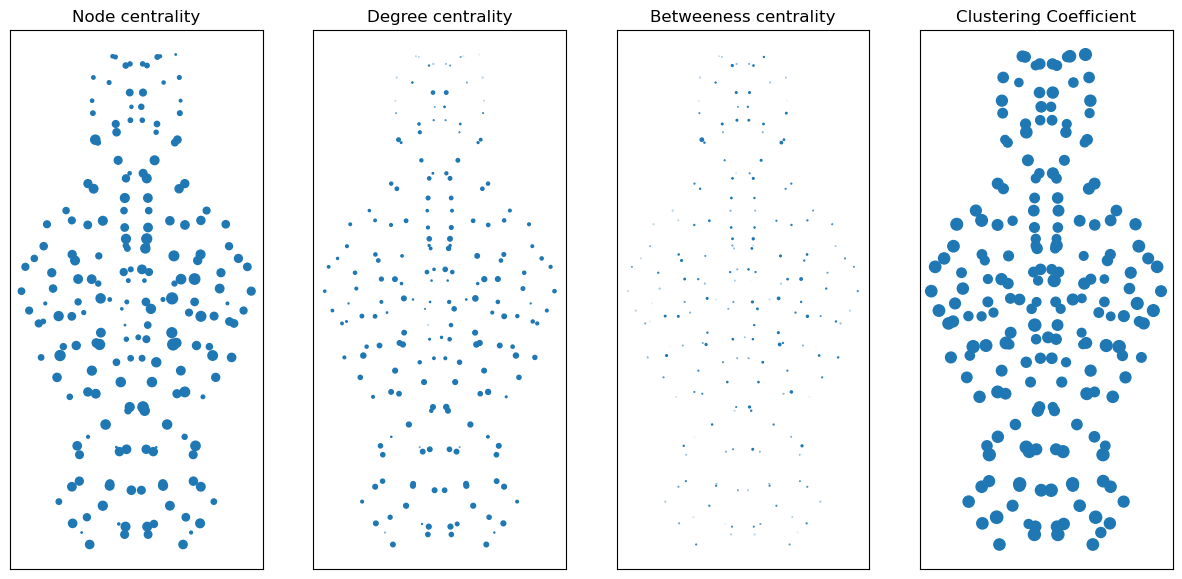

In [20]:
# Establish the figure
fig, axes = plt.subplots(1, 4, figsize=(15, 7))

# Auxilary dictionary
def get_dict_format(nid, elements):
    cof_d = {}
    for A, B in zip(nid, elements):
        cof_d[A] = B*100
    return cof_d

# Generate and draw all the graphs:
# Generate for degree centrality 
nid, deg_cent= ga.get_node_centrality(graph_fish, gtype='nx')
cof_d = get_dict_format(nid, deg_cent)
ga.draw_network_graph(graph_fish, coord_pos, cof_d, node_options = {'node_color': 'blue'}, edge_options = {}, ax=axes[0], title='Node centrality')

# Generate for eigenvector centrality
nid, ev_centr =  ga.get_eigenvector_centrality(graph_fish, gtype='nx')
cof_d = get_dict_format(nid, ev_centr)
ga.draw_network_graph(graph_fish, coord_pos, cof_d, node_options = {'node_color': 'blue'}, edge_options = {}, ax=axes[1], title='Degree centrality') 

# Generate for betweeness centrality
nid, bt_centr = ga.get_betweenness_centrality(graph_fish)
cof_d = get_dict_format(nid, bt_centr)
ga.draw_network_graph(graph_fish, coord_pos, cof_d, node_options = {'node_color': 'blue'}, edge_options = {}, ax=axes[2], title='Betweeness centrality')

# Generate clustering coefficients for nodes
nid, clst_centr = ga.get_clustering_coefficient(graph_fish)
cof_d = get_dict_format(nid, clst_centr)
ga.draw_network_graph(graph_fish, coord_pos, cof_d, node_options = {'node_color': 'blue'}, edge_options = {}, ax=axes[3], title='Clustering Coefficient')
plt.show()

# Generate and plot statistics for each of the values 



In [17]:
# TODO: Implement and 
part, modularity = ga.louvain_clustering(graph_fish)

In [ ]:
fig, axes = plt.subplots(figsize=(15, 7))
ga.draw_network_graph(graph_fish, coord_pos, cof_d, node_options = {'node_color': 'blue'}, edge_options = {},draw_edge=True)

In [ ]:
# TODO: Implement other 

In [ ]:
# TODO: Implement other clustering mechanisms

First, omni is used to map each vertex in each connectome to a -dimensional vector. That is, ever graph is mapped to a  matrix, where  is the number of vertices in each connectome.

Next, classical multidimensinal scaling (cMDS) is used to further embed each connectome representation in a 2-dimensional space. This is accomplished via an eigendecomposition of a the dissimilarity matrix constructed from pairwise dissimilarity of each connectome embedding.

In [ ]:
# TODO: Embedd onto lower space for comparing graphs
# Jointly embed graphs using OMNI
embedder = OmnibusEmbed()
omni_embedding = embedder.fit_transform(graphs)
print(f"Omnibus embedding shape is {omni_embedding.shape}")

# Further reduce dimensionality with cMDS
cmds = ClassicalMDS(2)
cmds_embedding = cmds.fit_transform(omni_embedding)
print(f"cMDS embedding shape is {cmds_embedding.shape}")